Number of training images: 1027
Number of testing images: 256
Epoch 1/5


C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 348ms/step - accuracy: 0.7391 - loss: 0.5200 - val_accuracy: 0.7891 - val_loss: 1.3360
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.9671 - loss: 0.0753 - val_accuracy: 0.8359 - val_loss: 1.9468
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - accuracy: 0.9842 - loss: 0.0375 - val_accuracy: 0.8516 - val_loss: 1.6894
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - accuracy: 0.9758 - loss: 0.0592 - val_accuracy: 0.8164 - val_loss: 2.1841
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.9317 - loss: 0.2812 - val_accuracy: 0.8516 - val_loss: 1.7203
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 329ms/step - accuracy: 0.5776 - loss: 0.7811 - val_accuracy: 0.6953 - val_loss: 0.7693
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - accuracy: 0.8493 - loss: 0.3349 - val_accuracy: 0.7578 - val_loss: 0.6349
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.8968 - loss: 0.2354 - val_accuracy: 0.7109 - val_

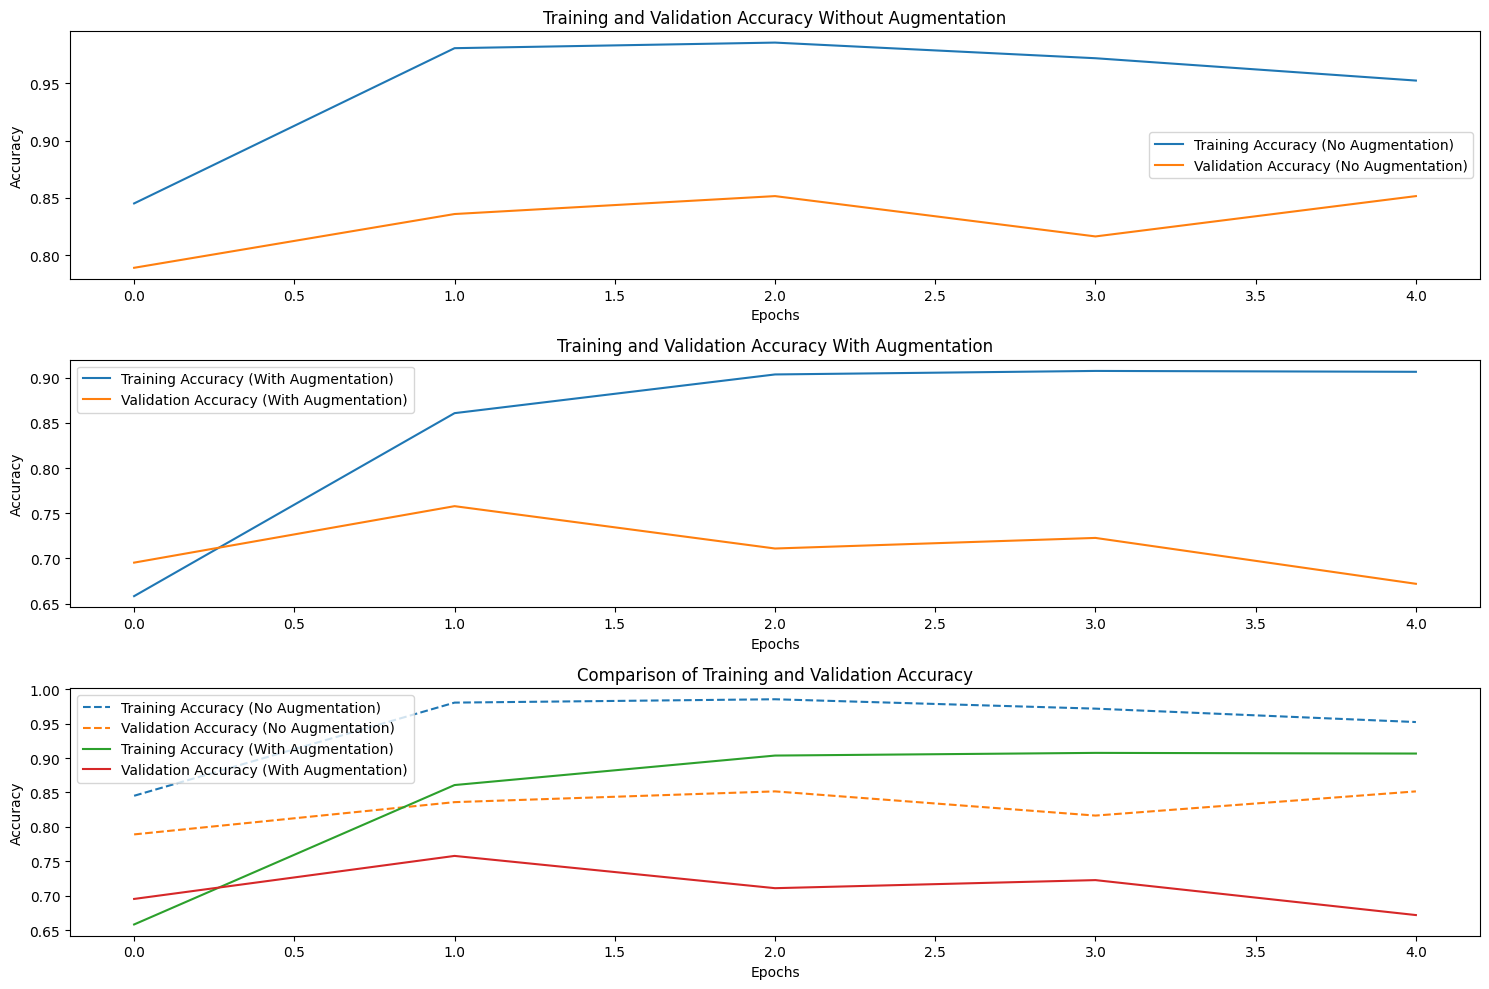

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], with_info=True, as_supervised=True)

train_size = ds_info.splits['train'].num_examples
test_size = ds_info.splits['test'].num_examples
print(f"Number of training images: {train_size}")
print(f"Number of testing images: {test_size}")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2)
])


def prepare(ds, batch_size=32, augment=False):
    ds = ds.map(lambda x, y: (tf.image.resize(x, (128, 128)), y), num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(tf.data.AUTOTUNE)

train_ds = prepare(ds_train, augment=False)
train_ds_augmented = prepare(ds_train, augment=True)
test_ds = prepare(ds_test)

def create_cnn_model():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_no_aug = create_cnn_model()
model_aug = create_cnn_model()

history_no_aug = model_no_aug.fit(train_ds, epochs=5, validation_data=test_ds)

history_aug = model_aug.fit(train_ds_augmented, epochs=5, validation_data=test_ds)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.title("Training and Validation Accuracy Without Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Training and Validation Accuracy With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


Number of training images: 1027
Number of testing images: 256
Epoch 1/2
17/17 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.9093 - loss: 0.1712 - val_accuracy: 0.6680 - val_loss: 2.7795
Epoch 2/2
17/17 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step - accuracy: 0.9937 - loss: 0.0231 - val_accuracy: 0.5000 - val_loss: 31.6667
Training Accuracy: 99.32%
Validation Accuracy: 50.00%


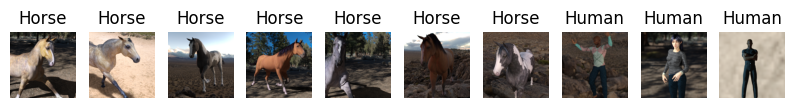

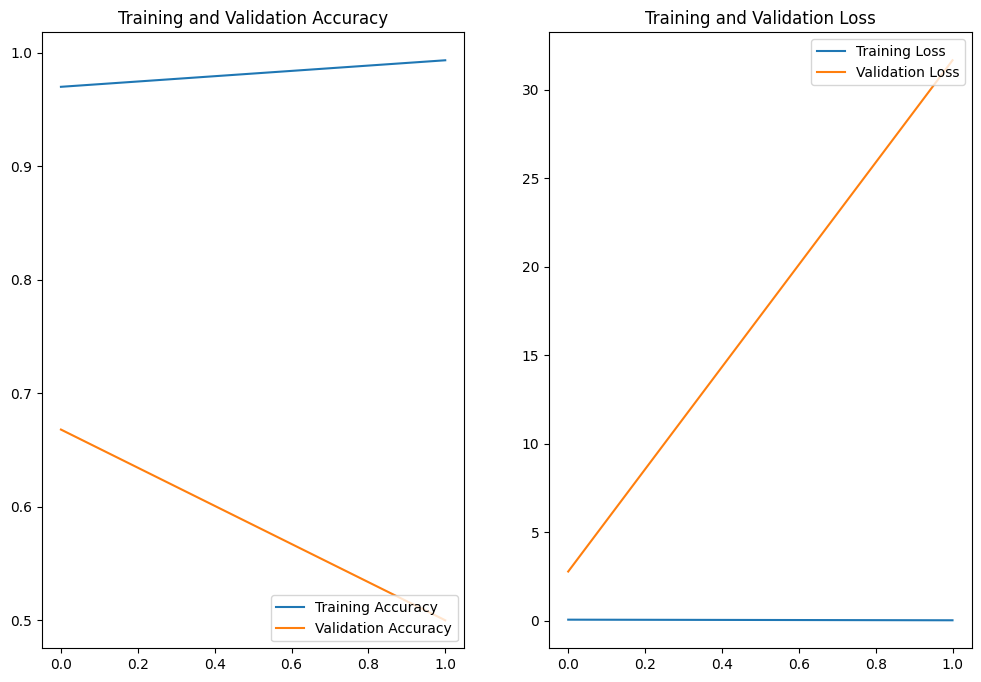

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

train_ds, test_ds = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

num_train = tf.data.experimental.cardinality(train_ds).numpy()
num_test = tf.data.experimental.cardinality(test_ds).numpy()
print(f"Number of training images: {num_train}")
print(f"Number of testing images: {num_test}")

def plot_samples(dataset, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title("Human" if label == 1 else "Horse")
        plt.axis("off")

plot_samples(train_ds)

def augment(image, label):
    image = tf.image.resize(image, (224, 224)) 
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, 0.2, 0.5)
    image = tf.image.rot90(image)
    return image, label

augmented_train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda image, label: (tf.image.resize(image, (224, 224)), label), 
                        num_parallel_calls=tf.data.AUTOTUNE)


def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  
    return image, label

augmented_train_ds = augmented_train_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

batch_size = 64
augmented_train_ds = augmented_train_ds.cache().shuffle(1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                            include_top=False,
                                            weights="imagenet")

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 2
history = model.fit(augmented_train_ds, validation_data=test_ds, epochs=epochs)

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)
